## Классификация новостей [AG's News Topic Classification Dataset](https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv)

Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина новости
max_news_len = 30
# Количество классов новостей
nb_classes = 4

## Загрузка набора данных

Загружаем данные для обучения

In [3]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv -O train.csv

--2023-01-24 17:35:48--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv [following]
--2023-01-24 17:35:48--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.08s   

2023-01-24 17:35:51 (363 MB/s) - ‘train.csv’ saved [29470338/29470338]



Загружаем данные для тестирования

In [4]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv -O test.csv

--2023-01-24 17:36:00--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv [following]
--2023-01-24 17:36:01--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857427 (1.8M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.77M  --.-KB/s    in 0.007s  

2023-01-24 17:36:02 (267 MB/s) - ‘test.csv’ saved [1857427/1857427]



Загружаем имена классов

In [5]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt -O classes.txt

--2023-01-24 17:36:07--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]      31  --.-KB/s    in 0s      

2023-01-24 17:36:07 (2.08 MB/s) - ‘classes.txt’ saved [31/31]



## Просматриваем данные

In [6]:
!ls

classes.txt  sample_data  test.csv  train.csv


In [7]:
!cat classes.txt

World
Sports
Business
Sci/Tech


In [8]:
!head train.csv

"3","Wall St. Bears Claw Back Into the Black (Reuters)","Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
"3","Carlyle Looks Toward Commercial Aerospace (Reuters)","Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
"3","Oil and Economy Cloud Stocks' Outlook (Reuters)","Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums."
"3","Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)","Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
"3","Oil prices soar to all-time record, posing new menace to US e

In [9]:
!head test.csv

"3","Fears for T N pension after talks","Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."
"4","The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)","SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
"4","Ky. Company Wins Grant to Study Peptides (AP)","AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
"4","Prediction Unit Helps Forecast Wildfires (AP)","AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning wil

In [10]:
!wc -l train.csv
!wc -l test.csv

120000 train.csv
7600 test.csv


## Загружаем данные в память

Читаем данные из файла

In [11]:
train = pd.read_csv('train.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

In [12]:
train

,class,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Выделяем данные для обучения

In [13]:
news = train['text']

In [14]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Выделяем правильные ответы

In [15]:
y_train = utils.to_categorical(train['class'] - 1, nb_classes)

In [16]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

#Процесс предобработке данных

1. **Изменение регистра:** Одна из простейших форм предварительной обработки текста — перевод всех символов текста в нижний регистр.
2. **Токенизация:** Токенизация — процесс разбиения текстового документа на отдельные слова, которые называются токенами.
3. **Удаление стоп-слов:**
Стоп-слова — это часто используемые слова, которые не вносят никакой дополнительной информации в текст. Слова типа "the", "is", "a" не 
несут никакой ценности и только добавляют шум в данные.
4. **Стеммизация:**
Стеммизация — процесс приведения слова к его корню/основе.
Он приводит различные вариации слова (например, "help", "helping", "helped", "helpful") к его начальной форме (например, "help"), удаляет все придатки слов (приставка, суффикс, окончание) и оставляет только основу слова.
5. **Лемматизация:**
Лемматизация похожа на стеммизацию в том, что она приводит слово к его начальной форме, но с одним отличием: в данном случае корень слова будет существующим в языке словом. Например, слово "caring" прекратится в "care", а не "car", как в стеммизаци.

## Токенизация текста

Токенизация (иногда – сегментация) по предложениям – это процесс разделения письменного языка на предложения-компоненты.

In [20]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Создаем токенизатор Keras

In [21]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на новостях

In [22]:
tokenizer.fit_on_texts(news)

Просматриваем словарь токенизатора

#Векторизация текстовых данных (Text Data Vectorization):


1. **«Мешок слов» (Bag of words (BOW)):**
одна из самых простых методик векторизации текста. В логике BOW два предложения могут называться одинаковыми, если содержат один и тот же набор слов. BOW создает словарь уникальных d слов в корпусе (собрание всех токенов в данных). Например, корпус на изображении выше состоит из всех слов предложений S1 и S2
2. **TF-IDF:**
Это расшифровывается как Term Frequency (TF)-Inverse Document Frequency (IDF).*Частота слова (Term Frequency):*
Term Frequency высчитывает вероятность найти какое-то слово в документе. Ну, например, мы хотим узнать, какова вероятрность найти слово wi в документе dj.*Обратная частота документа (Inverse Document Frequency):*В логике IDF, если слово встречается во всех документах, оно не очень полезно. Так определяется, насколько уникально слово во всем корпусе.



In [23]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

Преобразуем новости в числовое представление

In [24]:
sequences = tokenizer.texts_to_sequences(news)

Просматриваем новости в числовом представлении

In [25]:
index = 1
print(news[index])
print(sequences[index])

Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
[24, 863, 751, 371, 93, 84, 20, 2, 3916, 8, 453, 431, 6, 1308, 2799, 5, 1, 549, 237, 20, 3528, 2002, 14, 8267, 7, 216, 314, 4, 1, 131]


In [26]:
tokenizer.word_index['investment']

751

Ограничиваем длину отзывов

In [27]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [28]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   24,  758, 7851,  433,
        5786, 2861,    4, 5916,   33, 3642,  831,  432],
       [  24,  863,  751,  371,   93,   84,   20,    2, 3916,    8,  453,
         431,    6, 1308, 2799,    5,    1,  549,  237,   20, 3528, 2002,
          14, 8267,    7,  216,  314,    4,    1,  131],
       [  24, 2199,  463,  105, 1568, 1484,   64,    1,  397,    6,    1,
        1026,    8,  317,   33,  178,    3, 6377,   35,    1,  311,  131,
          99,   79,  189,    1, 6120,    4,    1, 1068],
       [   0,   24,  713,   29, 5142,   77, 3549, 7993,   23,    1,  737,
        3199,    5,  493,  106,   28, 1402,  573,    2,  825, 2601,   90,
         760, 2559,   22,   77,  292,   16,    7,   97],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  165,
          55,   77,  105, 8851, 1776,    6, 8268, 3454,    2,   21,  343,
        3036,   70,  266,  151, 

## Сверточная нейронная сеть

In [29]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_news_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(4, activation='softmax'))

In [30]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [31]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 26, 250)           40250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 392,894
Trainable params: 392,894
Non-trainable params: 0
__________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [32]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [33]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
844/844 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.8418
Epoch 1: val_accuracy improved from -inf to 0.88900, saving model to best_model_cnn.h5
844/844 [==============================] - 13s 5ms/step - loss: 0.4310 - accuracy: 0.8418 - val_loss: 0.3146 - val_accuracy: 0.8890
Epoch 2/5
836/844 [============================>.] - ETA: 0s - loss: 0.2492 - accuracy: 0.9145
Epoch 2: val_accuracy did not improve from 0.88900
844/844 [==============================] - 4s 5ms/step - loss: 0.2493 - accuracy: 0.9145 - val_loss: 0.3148 - val_accuracy: 0.8868
Epoch 3/5
840/844 [============================>.] - ETA: 0s - loss: 0.1935 - accuracy: 0.9328
Epoch 3: val_accuracy did not improve from 0.88900
844/844 [==============================] - 4s 5ms/step - loss: 0.1937 - accuracy: 0.9327 - val_loss: 0.3400 - val_accuracy: 0.8804
Epoch 4/5
840/844 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9518
Epoch 4: val_accuracy did not improve

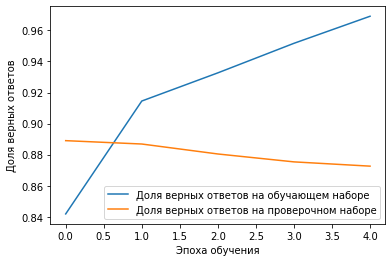

In [34]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [35]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(4, activation='softmax'))

In [36]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 323,204
Trainable params: 323,204
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [38]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [39]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
840/844 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7967
Epoch 1: val_accuracy improved from -inf to 0.88300, saving model to best_model_lstm.h5
844/844 [==============================] - 8s 7ms/step - loss: 0.5328 - accuracy: 0.7970 - val_loss: 0.3430 - val_accuracy: 0.8830
Epoch 2/5
841/844 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.9087
Epoch 2: val_accuracy improved from 0.88300 to 0.88975, saving model to best_model_lstm.h5
844/844 [==============================] - 5s 5ms/step - loss: 0.2809 - accuracy: 0.9087 - val_loss: 0.3139 - val_accuracy: 0.8898
Epoch 3/5
835/844 [============================>.] - ETA: 0s - loss: 0.2379 - accuracy: 0.9234
Epoch 3: val_accuracy did not improve from 0.88975
844/844 [==============================] - 4s 5ms/step - loss: 0.2379 - accuracy: 0.9234 - val_loss: 0.3220 - val_accuracy: 0.8874
Epoch 4/5
836/844 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.93

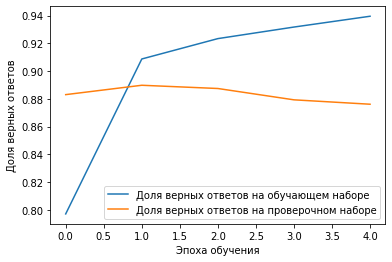

In [40]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [41]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_news_len))
model_gru.add(GRU(16))
model_gru.add(Dense(4, activation='softmax'))

In [42]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 32)            320000    
                                                                 
 gru (GRU)                   (None, 16)                2400      
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 322,468
Trainable params: 322,468
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model_gru.h5`

In [44]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [45]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
838/844 [============================>.] - ETA: 0s - loss: 0.5656 - accuracy: 0.7885
Epoch 1: val_accuracy improved from -inf to 0.88508, saving model to best_model_gru.h5
844/844 [==============================] - 6s 6ms/step - loss: 0.5641 - accuracy: 0.7892 - val_loss: 0.3334 - val_accuracy: 0.8851
Epoch 2/5
844/844 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.9076
Epoch 2: val_accuracy improved from 0.88508 to 0.89075, saving model to best_model_gru.h5
844/844 [==============================] - 5s 5ms/step - loss: 0.2818 - accuracy: 0.9076 - val_loss: 0.3100 - val_accuracy: 0.8907
Epoch 3/5
836/844 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.9203
Epoch 3: val_accuracy did not improve from 0.89075
844/844 [==============================] - 4s 5ms/step - loss: 0.2421 - accuracy: 0.9203 - val_loss: 0.3179 - val_accuracy: 0.8865
Epoch 4/5
839/844 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9272

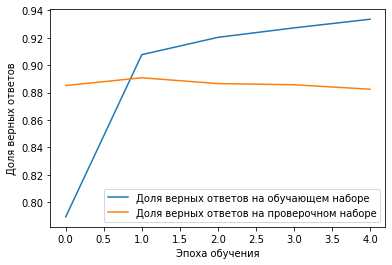

In [46]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования

In [47]:
test = pd.read_csv('test.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

In [48]:
test

,class,title,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


Преобразуем новости в числовое представление

Обратите внимание, что нужно использовать токенизатор, обученный на наборе данных train.

In [49]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [50]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [51]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2020, 3371,  449,   15, 6956,  252,   60,   33,
          28,  289,   12, 9088, 2184,  371,  169, 9284],
       [  92,  119,    4, 3472,    8,    1,  402,  134,   75, 5471, 1516,
        1227,    2, 3436,    8, 2744, 5220,  230,  936,   20, 2148,  117,
           1,   38,  561, 1974,    8,   14, 3957, 1218],
       [   2,   52, 5787,   18,    2, 4914,   15,    1,  525,    4, 4586,
         227,    2, 3922,    3, 1316,    2, 6888,    4, 2893,  576,   84,
          33,  758, 6515,    4,    1, 1013, 5154,    4],
       [9642, 1291,    6, 8714,   41,  671,   40, 2977,  177,    1,  108,
          26, 1027, 7300,   26,  760,    5, 3356,   40, 1271, 2450,   26,
        2170,   50, 3356,   26, 7415,    6, 9153,   26],
       [   0,    0,    0,    0,    0,    0,   39,  493, 7343,  832,  400,
         820,   28, 3827,    4,    1, 4474,   54, 9411,    1, 1273,   38,
        1230,    3, 1365,  348, 

Правильные ответы

In [52]:
y_test = utils.to_categorical(test['class'] - 1, nb_classes)

In [53]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных

### Одномерная сверточная сеть 

In [54]:
model_cnn.load_weights(model_cnn_save_path)

In [55]:
model_cnn.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8936


[0.32402822375297546, 0.8935526609420776]

### Сеть LSTM

In [56]:
model_lstm.load_weights(model_lstm_save_path)

In [ ]:
model_lstm.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8916


[0.32402247190475464, 0.8915789723396301]

### Сеть GRU

In [57]:
model_gru.load_weights(model_gru_save_path)

In [58]:
model_gru.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 3ms/step - loss: 0.3109 - accuracy: 0.8938


[0.31091177463531494, 0.893815815448761]